In [1]:
import pathlib
print(pathlib.Path().resolve())

C:\Users\afsha\Desktop\proj\MovieRecommender\ml


In [2]:
import pandas as pd
import numpy as np

In [4]:
ratings = pd.read_csv(
    r"data/ml-100k/u.data",
    sep="\t",
    names=["userId", "movieId", "rating", "timestamp"]
)

movies = pd.read_csv(
    r"data/ml-100k/u.item",
    sep="|",
    encoding='latin-1',  # to handle special characters
    names=[
        "movieId", "title", "release_date", "video_release_date", 
        "IMDb_URL", "unknown", "Action", "Adventure", "Animation", 
        "Children's", "Comedy", "Crime", "Documentary", "Drama", 
        "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
        "Romance", "Sci-Fi", "Thriller", "War", "Western"
    ]
)

In [5]:
print("Ratings dataset head:")
print(ratings.head())

print("\nMovies dataset head:")
print(movies.head())

Ratings dataset head:
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596

Movies dataset head:
   movieId              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get

In [6]:
print("Missing values in ratings dataset:")
print(ratings.isnull().sum())

print("\nMissing values in movies dataset:")
print(movies.isnull().sum())

Missing values in ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in movies dataset:
movieId                  0
title                    0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64


In [7]:
# Drop video_release_date (mostly missing)
movies.drop(columns=['video_release_date'], inplace=True)

# Fill missing release_date and IMDb_URL
movies['release_date'].fillna('unknown', inplace=True)
movies['IMDb_URL'].fillna('unknown', inplace=True)

# Verify again
print(movies.isnull().sum())


movieId         0
title           0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


C:\Users\afsha\AppData\Local\Temp\ipykernel_22884\2362261711.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['release_date'].fillna('unknown', inplace=True)
C:\Users\afsha\AppData\Local\Temp\ipykernel_22884\2362261711.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [10]:
# Safer way to fill missing values
movies['release_date'] = movies['release_date'].fillna('unknown')
movies['IMDb_URL'] = movies['IMDb_URL'].fillna('unknown')


In [9]:
# Drop the column only if it exists
if 'video_release_date' in movies.columns:
    movies = movies.drop(columns=['video_release_date'])


In [11]:
# Check missing values in movies dataframe
print(movies.isna().sum())

# Check missing values in ratings dataframe
print(ratings.isna().sum())


movieId         0
title           0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [12]:
data = pd.merge(ratings, movies[["movieId", "title"]], on="movieId")
print("Merged dataset head:")
print(data.head())


Merged dataset head:
   userId  movieId  rating  timestamp                       title
0     196      242       3  881250949                Kolya (1996)
1     186      302       3  891717742    L.A. Confidential (1997)
2      22      377       1  878887116         Heavyweights (1994)
3     244       51       2  880606923  Legends of the Fall (1994)
4     166      346       1  886397596         Jackie Brown (1997)


In [13]:
user_movie_matrix = data.pivot_table(
    index='userId', 
    columns='title', 
    values='rating'
)

print("User-Movie matrix shape:", user_movie_matrix.shape)
print(user_movie_matrix.head())


User-Movie matrix shape: (943, 1664)
title   'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
userId                                                                   
1                             NaN           NaN                    2.0   
2                             NaN           NaN                    NaN   
3                             NaN           NaN                    NaN   
4                             NaN           NaN                    NaN   
5                             NaN           NaN                    2.0   

title   12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
userId                                                                 
1                       5.0         NaN                          NaN   
2                       NaN         NaN                          NaN   
3                       NaN         2.0                          NaN   
4                       NaN         NaN                          NaN   
5           

Top 5 movies by number of ratings:
 movieId
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64
Top 5 users by number of ratings:
 userId
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64


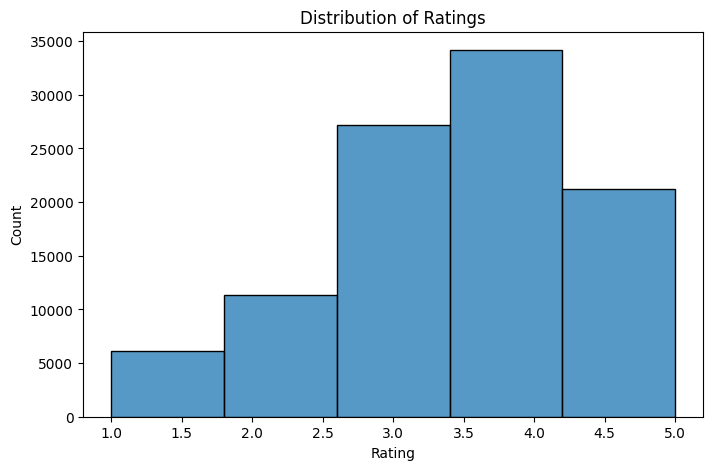

In [15]:
# Number of ratings per movie
ratings_per_movie = ratings.groupby('movieId')['rating'].count()
print("Top 5 movies by number of ratings:\n", ratings_per_movie.sort_values(ascending=False).head())

# Number of ratings per user
ratings_per_user = ratings.groupby('userId')['rating'].count()
print("Top 5 users by number of ratings:\n", ratings_per_user.sort_values(ascending=False).head())

# Rating distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Number of movies per genre:
 Drama          725
Comedy         505
Thriller       251
Action         251
Romance        247
Adventure      135
Children's     122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64


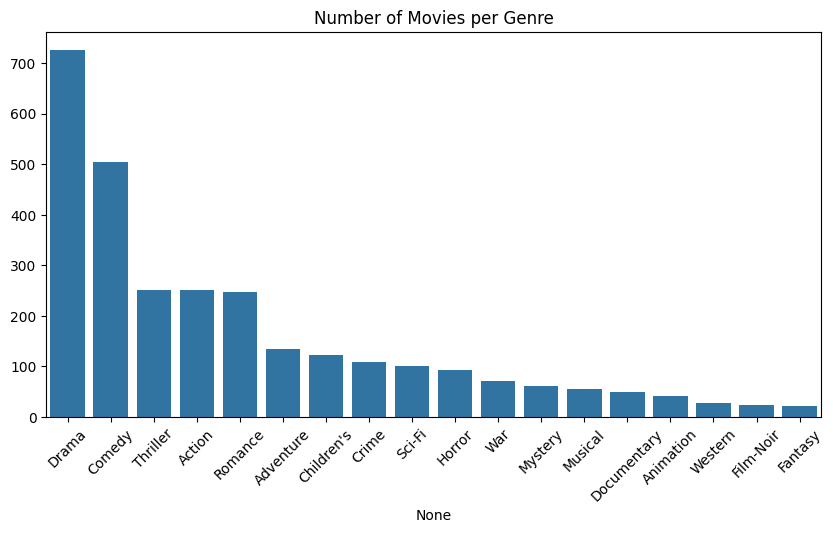

In [16]:
# Count of movies per genre
genre_cols = movies.columns[5:]  # All genre columns
movies_per_genre = movies[genre_cols].sum().sort_values(ascending=False)
print("Number of movies per genre:\n", movies_per_genre)

# Visualize top genres
plt.figure(figsize=(10,5))
sns.barplot(x=movies_per_genre.index, y=movies_per_genre.values)
plt.xticks(rotation=45)
plt.title('Number of Movies per Genre')
plt.show()

In [17]:
# Merge ratings and movies datasets
data = ratings.merge(movies, on='movieId')
print("Merged dataset (first 5 rows):\n", data.head())

Merged dataset (first 5 rows):
    userId  movieId  rating  timestamp                       title  \
0     196      242       3  881250949                Kolya (1996)   
1     186      302       3  891717742    L.A. Confidential (1997)   
2      22      377       1  878887116         Heavyweights (1994)   
3     244       51       2  880606923  Legends of the Fall (1994)   
4     166      346       1  886397596         Jackie Brown (1997)   

  release_date                                           IMDb_URL  unknown  \
0  24-Jan-1997    http://us.imdb.com/M/title-exact?Kolya%20(1996)        0   
1  01-Jan-1997  http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...        0   
2  01-Jan-1994  http://us.imdb.com/M/title-exact?Heavyweights%...        0   
3  01-Jan-1994  http://us.imdb.com/M/title-exact?Legends%20of%...        0   
4  01-Jan-1997  http://us.imdb.com/M/title-exact?imdb-title-11...        0   

   Action  Adventure  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0       0

In [18]:
# Average rating per movie
movie_avg_rating = data.groupby('title')['rating'].mean()
# Number of ratings per movie
movie_rating_count = data.groupby('title')['rating'].count()

# Combine into a single DataFrame
movie_stats = pd.DataFrame({
    'average_rating': movie_avg_rating,
    'num_of_ratings': movie_rating_count
})

# Sort by number of ratings
movie_stats_sorted = movie_stats.sort_values('num_of_ratings', ascending=False)
print(movie_stats_sorted.head())

                           average_rating  num_of_ratings
title                                                    
Star Wars (1977)                 4.358491             583
Contact (1997)                   3.803536             509
Fargo (1996)                     4.155512             508
Return of the Jedi (1983)        4.007890             507
Liar Liar (1997)                 3.156701             485


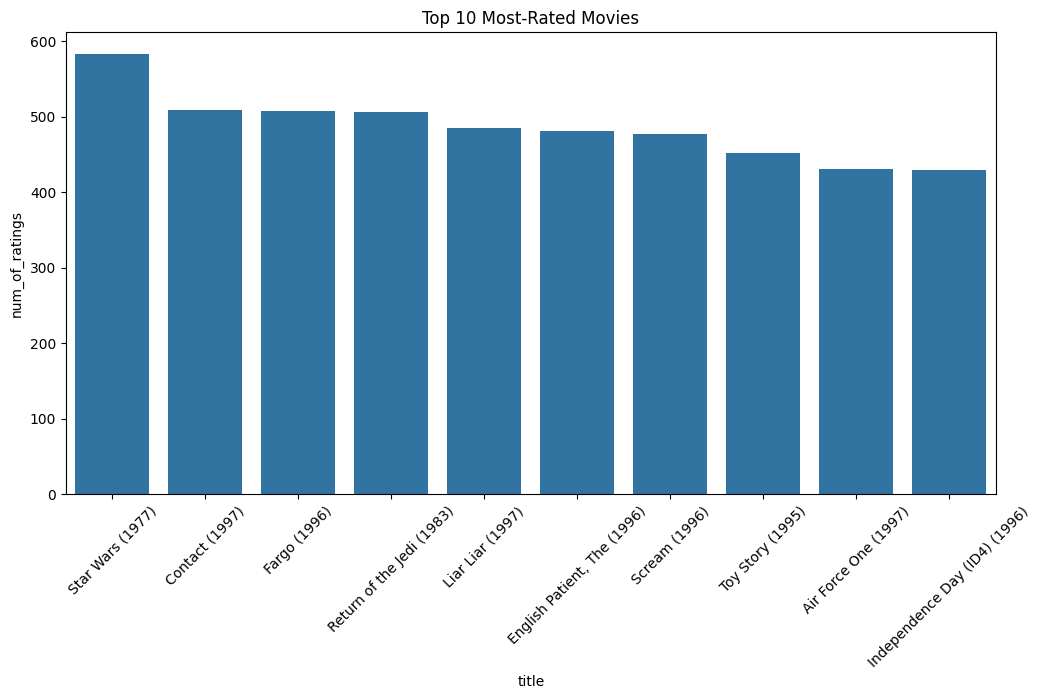

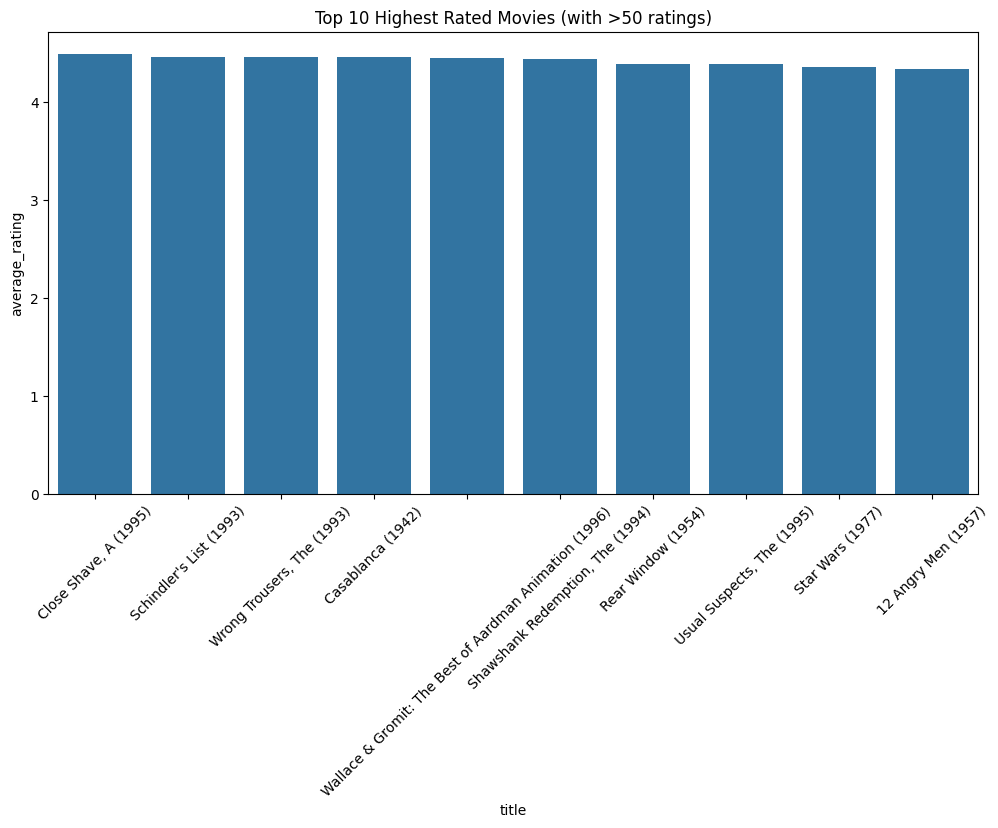

In [19]:
# Plot top 10 most-rated movies
top_movies = movie_stats_sorted.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_movies.index, y=top_movies['num_of_ratings'])
plt.xticks(rotation=45)
plt.title('Top 10 Most-Rated Movies')
plt.show()

# Plot top 10 highest average rated movies (with >50 ratings to avoid bias)
popular_movies = movie_stats[movie_stats['num_of_ratings']>50]
top_rated_movies = popular_movies.sort_values('average_rating', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_rated_movies.index, y=top_rated_movies['average_rating'])
plt.xticks(rotation=45)
plt.title('Top 10 Highest Rated Movies (with >50 ratings)')
plt.show()